In [0]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report #confusion_matrix,
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV  #, cross_val_score
%matplotlib inline

In [0]:
red_csv = os.path.join(os.getcwd(), 'winequality-red.csv') #os.path.join(os.getcwd(),'data')直接得到當前工作的目錄
red_train = pd.read_csv(red_csv,sep = ";")
print("shape:",red_train.shape)
red_train.head()

shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
def examine_missing_data(df): 
    missing = df.isnull().sum().sort_values(ascending=False) 
    missing_percent = (100 * df.isnull().sum() / len(df)).sort_values(ascending=False) #缺失數/長度
    
    missing_table = pd.concat([missing, missing_percent], axis=1)  #結合兩張變數的值
    missing_table = missing_table.rename(columns={0: '缺失值數量', 1: '缺失值占比(%)'})
    missing_table = missing_table[missing_table.iloc[:, 1] != 0]
    print("總共有%d個特徵，其中存在缺失值的特徵數為%d" % (df.shape[1], missing_table.shape[0]))

    return missing_table
missing_values = examine_missing_data(red_train) 
missing_values.head()

總共有12個特徵，其中存在缺失值的特徵數為0


,缺失值數量,缺失值占比(%)


In [0]:
red_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


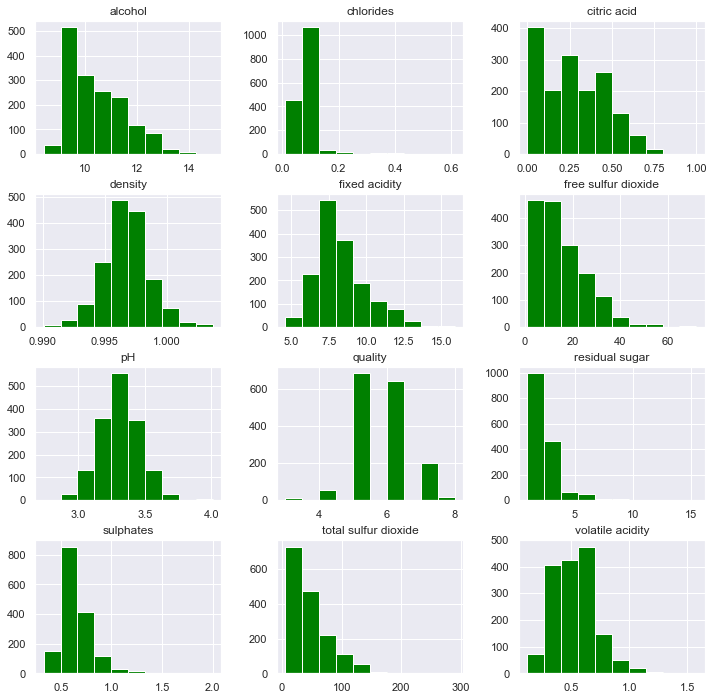

In [0]:
#可視化
sns.set()
red_train.hist(figsize=(12,12), color='green')
plt.show()

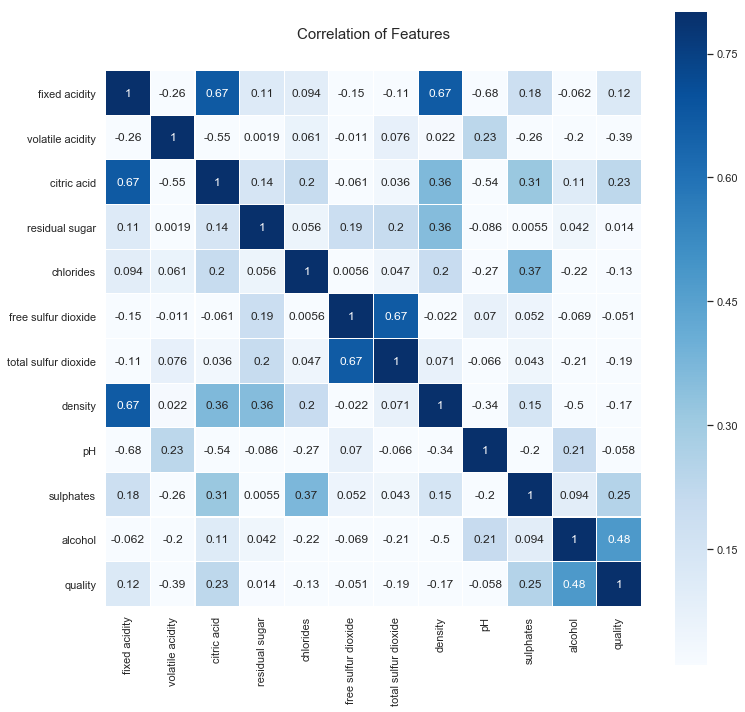

In [0]:
cmap="Blues"
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(red_train.astype(float).corr(),cmap=cmap,linewidths=0.1,vmax=0.8,vmin=0.01, square=True, 
            linecolor='white', annot=True)

C:\Users\Freya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


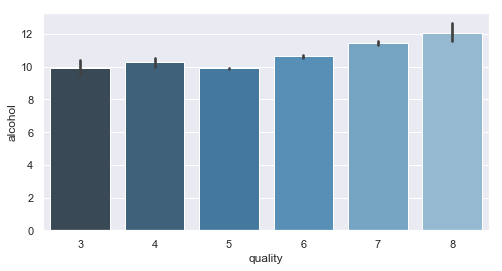

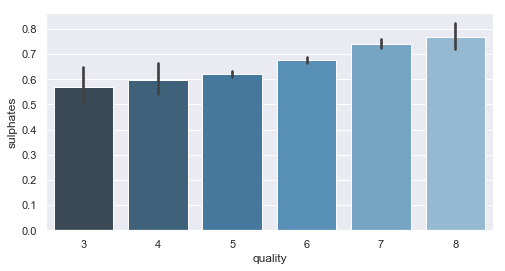

In [0]:
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'alcohol', data = red_train,palette="Blues_d")
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'sulphates', data = red_train,palette="Blues_d")

In [0]:
#cut函数是利用數值區間將數值分類進行離散化
bins = (2, 4, 6, 9)
group_names = ['bad','normal','good']
red_train['quality'] = pd.cut(red_train['quality'], bins = bins, labels = group_names)

In [0]:
label_quality = LabelEncoder()
red_train['quality'] = label_quality.fit_transform(red_train['quality'])

In [0]:
red_train['quality'].value_counts()  # 0=level(bad)3-4: 63  2=level(normal)5-6: 1319  1=level(good)7-8: 217

2    1319
1     217
0      63
Name: quality, dtype: int64

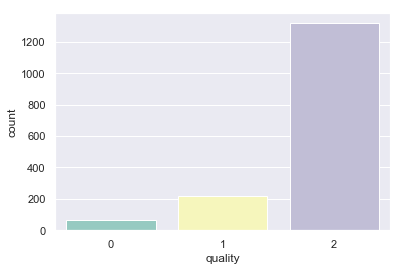

In [0]:
sns.countplot(red_train['quality'],palette="Set3")

In [0]:
#指定參數 axis = 0 表示刪除觀測值（row），指定參數 axis = 1 表示刪除欄位（column）
#separate train & test
X = red_train.drop('quality', axis = 1)
y = red_train['quality']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)#參數42用來確保每次切分資料的結果都相同

# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train = ((X_train-X_train.mean())/X_train.std())
# X_test = ((X_test-X_test.mean())/X_test.std())

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

print('標準化後的train平均值:','\n',X_train.mean(axis=0))
print('標準差:','\n',X_train.std(axis=0))
print('標準化後的test平均值:','\n',X_test.mean(axis=0))
print('標準差:','\n',X_test.std(axis=0))

標準化後的train平均值: 
 fixed acidity            8.323690
volatile acidity         0.530559
citric acid              0.272471
residual sugar           2.555473
chlorides                0.088448
free sulfur dioxide     15.876075
total sulfur dioxide    46.657154
density                  0.996774
pH                       3.311650
sulphates                0.660023
alcohol                 10.418100
dtype: float64
標準差: 
 fixed acidity            1.724243
volatile acidity         0.179275
citric acid              0.195448
residual sugar           1.435790
chlorides                0.049332
free sulfur dioxide     10.313517
total sulfur dioxide    32.941962
density                  0.001856
pH                       0.154016
sulphates                0.174605
alcohol                  1.052694
dtype: float64
標準化後的test平均值: 
 fixed acidity            8.303438
volatile acidity         0.516875
citric acid              0.265000
residual sugar           2.472187
chlorides                0.083544
free sulfur 

In [0]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.50      0.15      0.23        47
          2       0.83      0.97      0.90       262

avg / total       0.76      0.82      0.77       320



C:\Users\Freya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10) #使用GridSearchCV整個訓練集自動使用最佳超參數集重新建模
grid_svc.fit(X_train, y_train)

In [0]:
grid_svc.best_params_

#output: {'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [0]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')

svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       1.00      0.28      0.43        47
          2       0.85      1.00      0.92       262

avg / total       0.85      0.86      0.82       320



C:\Users\Freya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# from sklearn.svm import SVR
# clf = SVR()
# clf.fit(X_train, y_train)
# pred_SVR = clf.predict(X_test)
# print(classification_report(y_test, pred_SVR))